In [5]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [6]:
mel_cities = gpd.read_file('2024-project/2024-project/cartographic-resources/mel_communes.zip')
nordData = gpd.read_file('2024-project/2024-project/cartographic-resources/IRIS-GE_2-0_SHP_LAMB93_D059-2020/IRIS_GE.SHX')
dfe = gpd.read_parquet('2024-project/2024-project/cartographic-resources/mel.parquet')
bruit = gpd.read_file('2024-project/2024-project/donnees-bruit-nuit.zip')

In [135]:
lilleMetropolis = nordData[nordData.INSEE_COM.isin(mel_cities['insee']) ]
lilleMetropolis = lilleMetropolis.to_crs(3950)
lilleMetropolis.reset_index(drop=True)
True

True

In [133]:
bruit = bruit.to_crs(3950)
bruit = bruit.reset_index(drop=True)

In [ ]:
ax = lilleMetropolisBuffed.plot(color='white',edgecolor='black',linewidth=0.1,figsize=(15,15))
bruit.plot(ax=ax, color='red',linewidth=0.3,figsize=(15,15))

In [34]:
lilleMetropolis['surface_iris'] = lilleMetropolis.area
bruit.shape


# Assuming 'geometry' is the column containing the geometries in bruit
bruit['surface_bruit'] = bruit.area


(50000, 8)

In [69]:
lilleMetropolis.shape


(517, 8)

In [103]:
import geopandas as gpd

# Assuming 'geometry' is the column containing the geometries in lilleMetropolis
lilleMetropolis['surface_iris'] = lilleMetropolis.area

head = bruit.head(1000)

# Perform spatial join with how='left' to keep all iris geometries
result = gpd.overlay(lilleMetropolis, bruit, how='intersection')
result['intersection_area'] = result.geometry
grouped_result = result.groupby('CODE_IRIS')['intersection_area'].apply(lambda x: x.unary_union).reset_index()

combined_geometries = gpd.GeoDataFrame(grouped_result, geometry='intersection_area')



In [108]:
lilleMetropolis = lilleMetropolis.merge(combined_geometries, how='left', on='CODE_IRIS')
lilleMetropolis.columns

Index(['INSEE_COM', 'NOM_COM', 'IRIS', 'CODE_IRIS', 'NOM_IRIS', 'TYP_IRIS',
       'geometry', 'surface_iris', 'geometric_noise', 'intersection_area'],
      dtype='object')

In [115]:
lilleMetropolis['ratio_intersection'] = lilleMetropolis['intersection_area'].area / lilleMetropolis.geometry.area
lilleMetropolis['ratio_intersection'] = lilleMetropolis['ratio_intersection'].fillna(0)

lilleMetropolis['ratio_intersection'].max()

0.9999999999999999

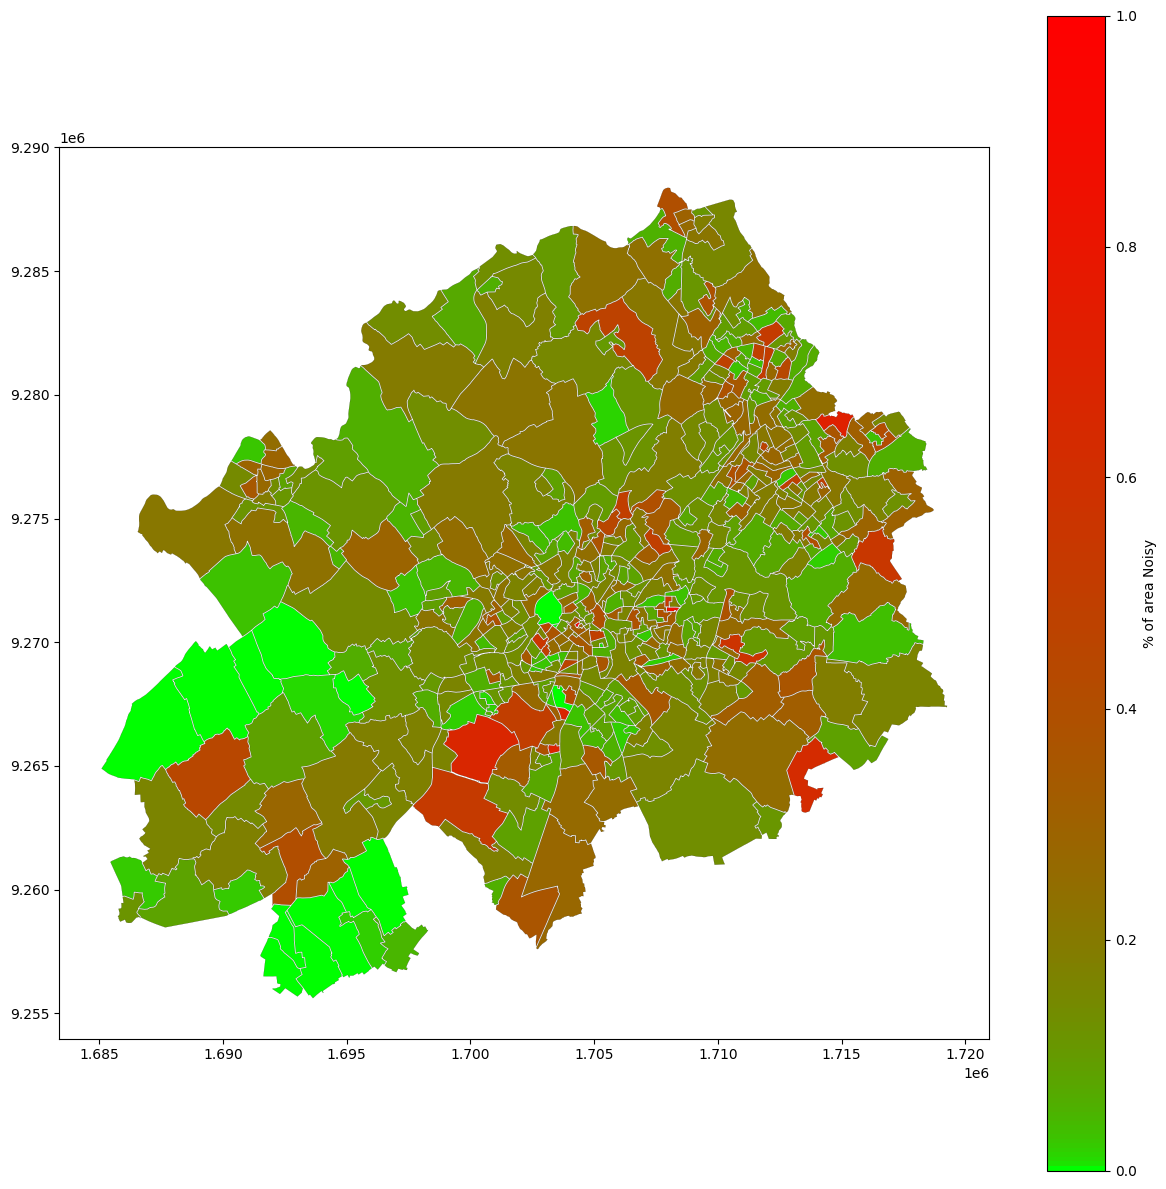

In [127]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
# Set up the colormap
colors = [(0, 1, 0), (1, 0, 0)]  # Green to Red
cmap = LinearSegmentedColormap.from_list('custom', colors, N=256, gamma=0.4)


# Set up the Normalize and ScalarMappable
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(cmap=cmap, norm=norm)

# Plot the GeoDataFrame with a gradient of color
ax = lilleMetropolis.plot(column='ratio_intersection', cmap=cmap, linewidth=0.1, edgecolor='black',
                                    legend=False, figsize=(15, 15))

# Add colorbar
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='% of area Noisy')

# Show the plot
plt.show()

<Axes: >

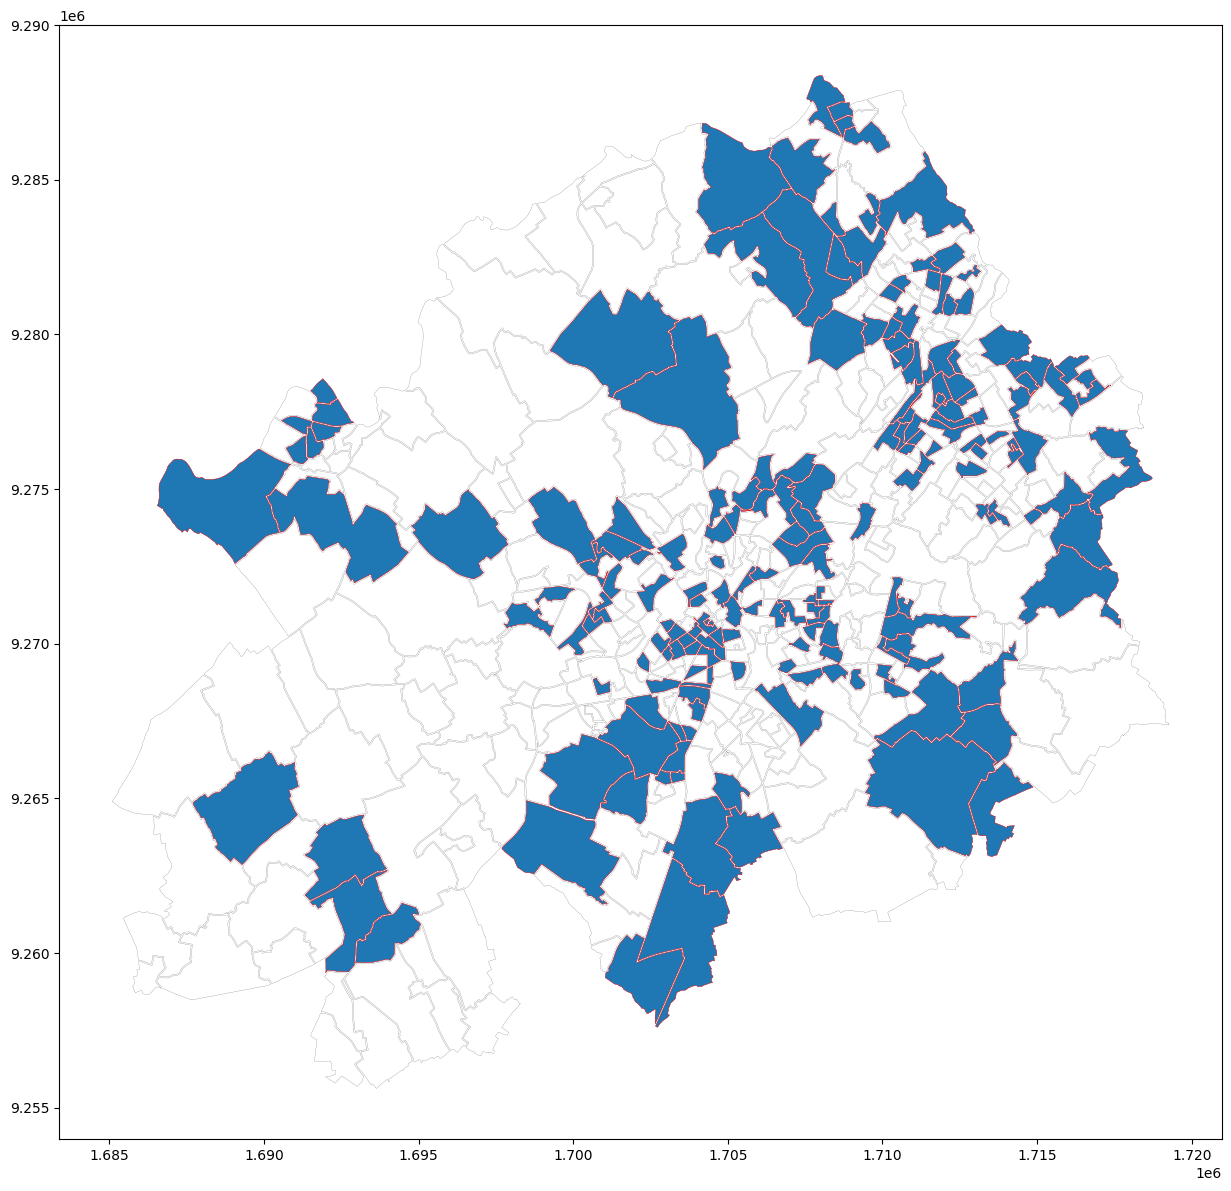

In [114]:
ax = lilleMetropolisBuffed.plot(color='white',edgecolor='black',linewidth=0.1,figsize=(15,15))
lilleMetropolisNoisy = lilleMetropolis[lilleMetropolis['ratio_intersection'] > 0.2]

lilleMetropolisNoisy.plot(ax=ax,edgecolor='red',linewidth=0.3,figsize=(15,15))

In [79]:
# Create Iris_area_noise with a column for Iris_intersection
Iris_area_noise = lilleMetropolis.merge(Iris_intersection, how='left', on='CODE_IRIS')

# Fill NaN values (no intersection) with 0
Iris_area_noise['Iris_intersection'] = Iris_area_noise['intersection_area'].fillna(0)

Iris_area_noise.shape

0          0.000000
1         24.912451
2      33167.408771
3        243.882007
4          0.000000
           ...     
512        0.000000
513     1494.613642
514        0.000000
515        0.000000
516        0.000000
Name: Iris_intersection, Length: 517, dtype: float64

In [78]:
Iris_area_noise['isNoisy'] = Iris_area_noise['Iris_intersection'] > 1
Iris_area_noise['isNoisy']

0      False
1       True
2       True
3       True
4      False
       ...  
512    False
513     True
514    False
515    False
516    False
Name: isNoisy, Length: 517, dtype: bool

<Axes: >

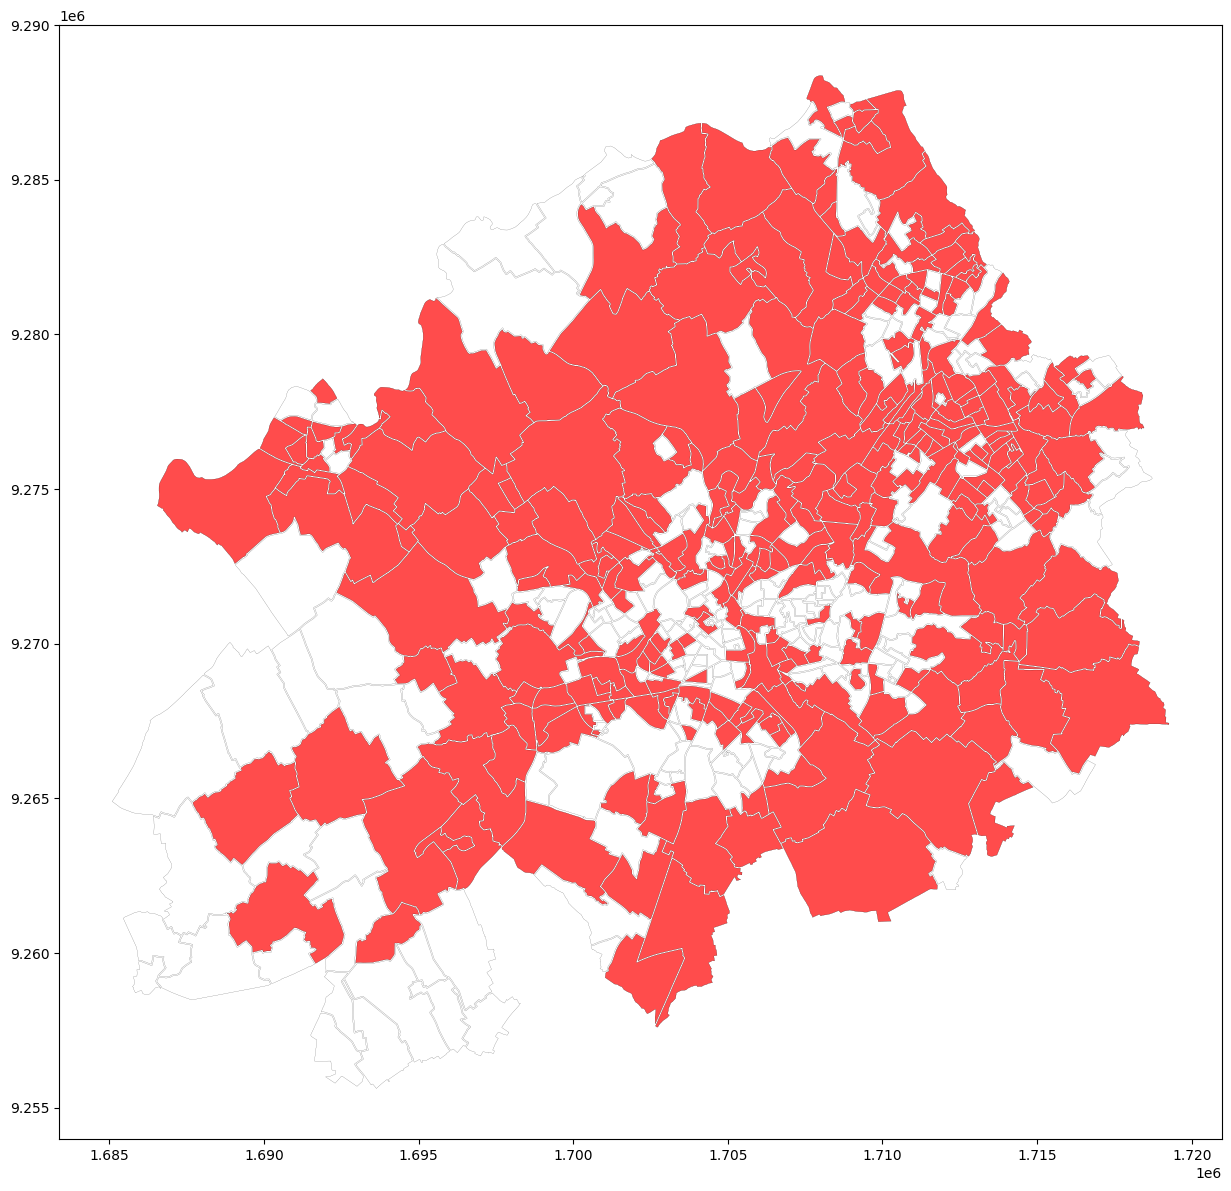

In [77]:
ax = lilleMetropolisBuffed.plot(color='white',edgecolor='black',linewidth=0.1,figsize=(15,15))
Iris_area_noise[Iris_area_noise['isNoisy']].plot(ax=ax, color='red', edgecolor='black', linewidth=0.1, alpha=0.7)

#resultFiltered.plot(ax=ax,edgecolor='red',linewidth=0.3,figsize=(15,15))